In [ ]:
!pip install pandas 
!pip install seaborn
!pip install matplotlib
!pip install numpy 
!pip install scipy 
!pip install statsmodels 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import shapiro, probplot

In [ ]:
'''
Data Cleaning function
'''
def clean_data(filename):
    '''
    Data Cleaning function
    Created a dictionary of key value pairs to replace
    categorical variables of object data type in pandas
    to a numerical data type in order to make quantifying
    easier for the functions applied in the assignment
    '''


    tp_dataset = pd.read_csv(filename, sep = ',', header = 0)

    clean_categorical = {"Arrest_Month": {'Jan-Mar': 1, 'Apr-June': 2, 'July-Sept': 3, 'Oct-Dec': 4},
                         "Age_group__at_arrest_": {'Aged 17 years and under': 1, 'Aged 17 years and younger': 1,
                                                    'Aged 18 to 24 years': 2, 'Aged 25 to 34 years': 3,
                                                    'Aged 35 to 44 years': 4, 'Aged 45 to 54 years': 5,
                                                    'Aged 55 to 64 years': 6, 'Aged 65 and older': 7,
                                                    'Aged 65 years and older': 7},
                         "Sex": {'F':1,'M':2,'U':3},
                         "Perceived_Race": {'Black': 1, 'East/Southeast Asian': 2, 'Indigenous': 3, 'Latino': 4,
                                            'Middle-Eastern': 5, 'South Asian': 6, 'Unknown or Legacy': 7, 'White': 8},
                         "Occurrence_Category":{'Assault': 1, 'Assault & Other crimes against persons': 2, 'Break & Enter': 3,
                                                'Break and Enter': 3, 'Crimes against Children': 4, 'Drug Related': 5,
                                                'Fraud': 6, 'FTA/FTC, Compliance Check & Parollee': 7, 'FTA/FTC/Compliance Check/Parollee': 8,
                                                'Harassment & Threatening': 9, 'Harassment/Threatening': 10, 'Homicide':11, 'Impaired':12,
                                                'LLA':13, 'Mental Health': 14, 'Mischief': 15, 'Mischief & Fraud': 16, 'Other Offence': 17,
                                                'Other Statute': 18, 'Other Statute & Other Incident Type':19,'Police Category - Administrative': 20,
                                                'Robbery & Theft': 21, 'Robbery/Theft': 22, 'Sexual Related Crime':23, 'Sexual Related Crimes & Crimes Against Children':24,
                                                'Vehicle Related': 25, 'Vehicle Related (inc. Impaired)': 26, 'Warrant': 27, 'Weapons': 28, 'Weapons & Homicide':29, 'Police Category - Incident': 30}}

    new_df = tp_dataset.replace(clean_categorical) # Use pandas replace to make the necessary
    df_no_nan = new_df.fillna(0)

    # Important when running this code:
      # to get individual outputs for each outcome: e.g. T-tests, plots/graphs, Anovas 
      # return only one the functions in return statement below and comment the rest out 
      # This will allow you to see individual output for each requirement of the assignment 
      # Right now I return everything at once, which is okay for submission but can be a bit confusing for interpretation of the output 
    return onewayAnova(df_no_nan), twowayAnova(tp_dataset), eda_t_test_one_samp(df_no_nan), eda_plots(df_no_nan)
   

In [ ]:
def eda_plots(cleaned_dataset):
    '''
    This function will take the cleaned dataset
    and output various plots and tables for eda
    '''
    sns.catplot(data=cleaned_dataset, x= "Arrest_Month", y= "Occurrence_Category", kind="box") # Boxplot describing arrest month and occurrence category
    plt.show()
    sns.heatmap(cleaned_dataset.corr()) # Correlation heat map of the data set
    sns.displot(cleaned_dataset, x="Occurrence_Category", hue= "Actions_at_arrest___Mental_inst")
    sns.displot(cleaned_dataset, x="Occurrence_Category", hue= "Sex")
    plt.show()
    moment_estimator = cleaned_dataset.describe(include = 'all') # Table to describe methods of moments
    print(moment_estimator)

In [ ]:
def eda_t_test_one_samp(cleaned_dataset):
    variables_of_interest = ["Arrest_Month","Age_group__at_arrest_","Sex","Perceived_Race","Occurrence_Category"]

    for i in range(len(variables_of_interest)):
        # Sample size stored in n
        x = cleaned_dataset[variables_of_interest[i]]
        pop_mean = cleaned_dataset['Actions_at_arrest___Mental_inst'].mean()

        # Create a one-sample t-test
        t_stat, p_val = ttest_1samp(x, pop_mean)

        # Print results
        print(variables_of_interest[i]+':',' t-statistic: ', t_stat)
        print(variables_of_interest[i]+':',' p-value: ', p_val)

        # Create two-sided test
        t_stat, p_val = ttest_1samp(x, pop_mean, alternative ='greater')
        print(variables_of_interest[i]+':',' p-value: ', p_val, 'greater')
        t_stat, p_val = ttest_1samp(x, pop_mean, alternative ='less')
        print(variables_of_interest[i]+':',' p-value: ', p_val, 'less')

        # Confidence Level
        alpha = 0.05 # 95 % Confidence Interval
        sample_size = x.sample()
        x_bar = sample_size.mean()
        s = np.std(x, ddof = 1) # Sample standard deviation
        sem = s / np.sqrt(sample_size)
        dof = sample_size - 1
        # Percent-point function of the t-distribution
        t = stats.t.ppf(1 - (alpha / 2), dof)
        # Margin of Error
        d = t * sem
        # Intervals
        upper_ci = x_bar + d
        lowe_ci = x_bar - d


In [ ]:
def onewayAnova(df):
    '''
    Use a one-way ANOVA to test for significant differences between each group
    '''
    sample_0 = df[df['Arrest_Month'] == 1]['Actions_at_arrest___Mental_inst']
    sample_1 = df[df['Arrest_Month'] == 2]['Actions_at_arrest___Mental_inst']
    sample_2 = df[df['Arrest_Month'] == 3]['Actions_at_arrest___Mental_inst']
    sample_3 = df[df['Arrest_Month'] == 4]['Actions_at_arrest___Mental_inst']

    f_stat, p_val = f_oneway(sample_0,sample_1, sample_2,sample_3)

    print('F-statistic: ', f_stat)
    print('p-value: ', p_val)

    tukey = pairwise_tukeyhsd(endog=df['Arrest_Month'],
                              groups=df['Actions_at_arrest___Mental_inst'],
                              alpha = 0.05)
    print(tukey)

    return get_significance(p_val)


In [ ]:
def twowayAnova(df):
    '''
    Use a two-way ANOVA to test for significant differences between each group

    It seems like the ols syntax only takes categorical variables, in order to align with the
    syntax I reverted to using the regular dataset without the transformations
    '''
    model = ols('Actions_at_arrest___Mental_inst ~ C(Arrest_Month) + C(Youth_at_arrest__under_18_years) + C(Arrest_Month):C(Youth_at_arrest__under_18_years)',data=df).fit()

    # Two way ANOVA
    TwoWay_anova = sm.stats.anova_lm(model, typ=2)
    print(TwoWay_anova)

    return shapiro_wik(model)

def shapiro_wik(x):
  # Calculate the residuals
  residuals = x.resid

  # Test for normality 
  stat, p = shapiro(residuals)

  print('The test for normality displays the test statistic and the p value, respectively: ',stat, p)

  return genQQPlot(residuals)

def genQQPlot(x):
  fig, ax = plt.subplots(figsize=(6,6))
  probplot(x, plot=ax)

# Thought to add a reference line for the normal distribution
  x = np.linspace(-3,3, 100)
  y = x 
  plt.plot(x,y, color = 'green')

  # Add title and axis labels
  plt.title("QQ plot of Two Way ANOVA")
  plt.xlabel("Actions at Arrest Regarding Mental Health")
  plt.ylabel("Youth + Arrest Month")

  plt.show()





In [ ]:
def get_significance(p):
    ''' Returns the significance of a p-value as a string of stars '''

    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''

F-statistic:  2.149702604763426
p-value:  0.09170216595416965
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0164 0.5049 -0.0317 0.0645  False
---------------------------------------------------
                                                         sum_sq       df  \
C(Arrest_Month)                                        0.165369      3.0   
C(Youth_at_arrest__under_18_years)                     2.480601      2.0   
C(Arrest_Month):C(Youth_at_arrest__under_18_years)     0.128526      6.0   
Residual                                            2103.444859  65264.0   

                                                            F        PR(>F)  
C(Arrest_Month)                                      1.710312  1.624680e-01  
C(Youth_at_arrest__under_18_years)                  38.483052  1.980934e-17  
C(Arrest_Month):C(Youth_at_arrest__under_18_years)   0.664633  

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


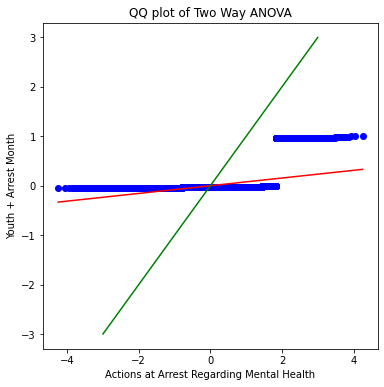

Arrest_Month:  t-statistic:  552.0626443302559
Arrest_Month:  p-value:  0.0
Arrest_Month:  p-value:  0.0 greater
Arrest_Month:  p-value:  1.0 less
Age_group__at_arrest_:  t-statistic:  677.4461957290091
Age_group__at_arrest_:  p-value:  0.0
Age_group__at_arrest_:  p-value:  0.0 greater
Age_group__at_arrest_:  p-value:  1.0 less
Sex:  t-statistic:  1146.754137785114
Sex:  p-value:  0.0
Sex:  p-value:  0.0 greater
Sex:  p-value:  1.0 less
Perceived_Race:  t-statistic:  427.95856736148215
Perceived_Race:  p-value:  0.0
Perceived_Race:  p-value:  0.0 greater
Perceived_Race:  p-value:  1.0 less
Occurrence_Category:  t-statistic:  358.17022171015725
Occurrence_Category:  p-value:  0.0
Occurrence_Category:  p-value:  0.0 greater
Occurrence_Category:  p-value:  1.0 less


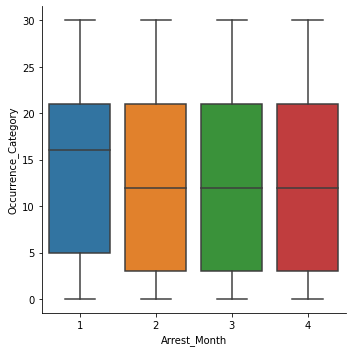

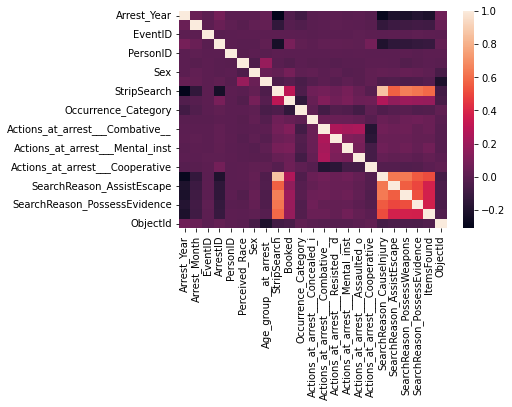

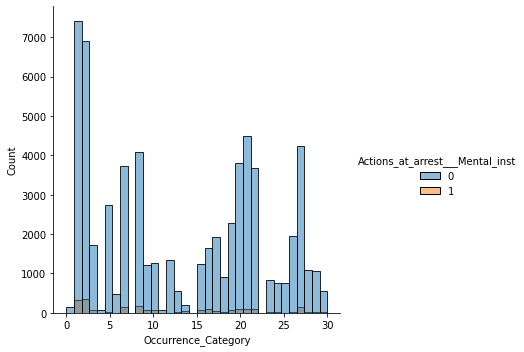

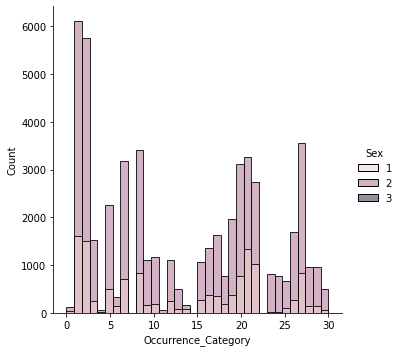

         Arrest_Year  Arrest_Month       EventID      ArrestID       PersonID  \
count   65276.000000  65276.000000  6.527600e+04  6.527600e+04   65276.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean     2020.510096      2.468319  1.029998e+06  5.989060e+06  318599.919695   
std         0.499902      1.126876  1.731809e+04  5.098329e+05   10815.387928   
min      2020.000000      1.000000  1.000000e+06  0.000000e+00  300000.000000   
25%      2020.000000      1.000000  1.015001e+06  6.015850e+06  309215.000000   
50%      2021.000000      2.000000  1.030006e+06  6.032168e+06  318595.500000   
75%      2021.000000      3.000000  1.044996e+06  6.048485e+06  327926.250000   
max      2021.000000      4.000000  1.060002e+06  6.064804e+06  337346.000000   

        Perceived_Race     

In [ ]:
dataset = clean_data('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')